In [ ]:
import os
import matplotlib.pyplot as plt
import joblib
import numpy as np
import pandas as pd

plt.style.use("fivethirtyeight")

## 1. What is the function of a summation junction of a neuron? What is the threshold activation function?
Ans. A summation junction for the input signals is weighted by the respective synaptic weight. Because it is a linear combiner or adder of the weighted input signals

## 2. What is a step function? What is the difference of step function with threshold function?
Ans. A step function is a discontinuous function whose graph consists of half-open intervals.It is often called the greatest integer function.

##3. Explain the McCulloch–Pitts model of neuron.
Ans. 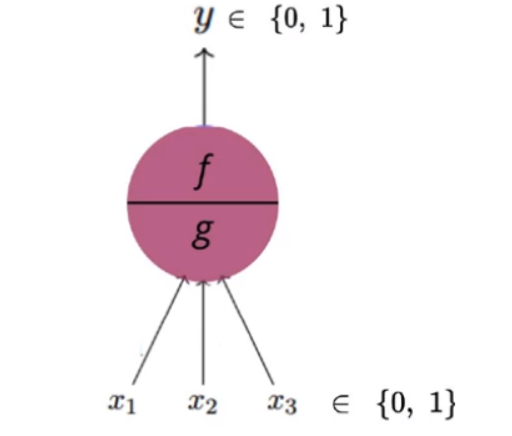

The function (soma) is actually split into two parts: g — The aggregates the inputs to a single numeric value and the function f produces the output of this neuron by taking the output of the g as the input i,e.. a single value as its argument. The function f will output the value 1 if the aggregation performed by the function g is greater than some threshold else it will return 0.

##4. Explain the ADALINE network model.
Ans. The Adaline (Adaptive Linear Element) and the Perceptron are both linear classifiers when considered as individual units. They both take an input, and based on a threshold, output e.g. either a 0 or a 1. A Perceptron takes that binary response and computes an error used to update the weights, whereas an Adaline uses a continous response value to update the weights (so before the binarized output is produced).

The fact that the Adaline does this, allows its updates to be more repesentative of the actual error, before it is thresholded, which in turn allows a model to converge more quickly.



##5. What is the constraint of a simple perceptron? Why it may fail with a real-world data set?
Ans. Simple Perceptron works only with linearly separable datasets,real-world datasets may have different tendencies hence simple perceptrons are not preferred.


##6. What is a linearly inseparable problem? What is the role of the hidden layer?
Ans.
 A linearly inseparable problem arises when the input and output cannot be separated by a straight line.
Hidden layers are the layers between the input and output layers,they help in forward and backward propagation


##7.Explain XOR problem in case of a simple perceptron.
Ans. XOR is a linearly inseparable connection,hence simple perceptron will give wrong outputs no matter how many epochs it runs


##8. Design a multi-layer perceptron to implement A XOR B.

In [ ]:
class Perceptron:
    def __init__(self, eta: float=None, epochs: int=None):
        self.weights = np.random.randn(3) * 1e-4
        self.eta = eta # learning rate
        self.epochs = epochs # iterations
        
        
    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)
    
    def activation_function(self, z):
        return np.where(z > 0, 1, 0)
        
    def prepare_data(df, target_col="y"):
        X = df.drop(target_col, axis=1)
        y = df[target_col]
    
        return X, y
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias: \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch + 1}")
            print("--"*10)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass: \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epoch: {epoch + 1}/{self.epochs}: \n{self.weights}")
            print(f"##"*10)
            
            
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)  
    
    

In [ ]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)

print(df_XOR)

X, y = prepare_data(df_XOR)


ETA = 0.1
EPOCHS = 10
model_XOR = Perceptron(eta=ETA, epochs=EPOCHS)
model_XOR.fit(X, y)
model_XOR.predict(X)

   x1  x2  y
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[-0.10000983 -0.09989478  0.19994237]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[-9.82940838e-06  1.05217006e-04 -5.76267523e-05]
####################
--------------------
for epoch >> 3
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[-0.10000983 -0.09989478  0.19994237]
####################
--------------------
for epoch >> 4
--------------------
predicted value afte

array([1, 1, 1, 1])

##9. Explain the single-layer feed forward architecture of ANN.
Ans. It is the simplest and most basic architecture of ANN’s. It consists of only two layers- the input layer and the output layer. The input layer consists of ‘m’ input neurons connected to each of the ‘n’ output neurons. The connections carry weights w11 and so on. The input layer of the neurons doesn’t conduct any processing – they pass the i/p signals to the o/p neurons. The computations are performed in the output layer. So, though it has 2 layers of neurons, only one layer is performing the computation. This is the reason why the network is known as SINGLE layer. Also, the signals always flow from the input layer to the output layer. Hence, the network is known as FEED FORWARD

##Explain the competitive network architecture of ANN.
Ans. In the comptetive network architecture units in a given layer are broken into several sets of nonoverlapping clusters. Each unit within a cluster inhibits every other unit within a cluster. Within each cluster, the unit receiving the largest input achieves its maximum value while all other units in the cluster are pushed to their minimum value.1 We have arbitrarily set the maximum value to 1 and the minimum value to 0.
           Every unit in every cluster receives inputs from all members of the same set of input units.A unit learns if and only if it wins the competition with other units in its cluster.
A stimulus pattern Sj consists of a binary pattern in which each element of the pattern is either active or inactive. An active element is assigned the value 1 and an inactive element is assigned the value 0.


##Consider a multi-layer feed forward neural network. Enumerate and explain steps in the backpropagation algorithm used to train the network.
Ans. 

##What are the advantages and disadvantages of neural networks?
Ans. 
Advantages of ANN : 
1. Storing information on the entire network 
2. Ability to work with incomplete knowledge
3. Having fault tolerance
4. Having a distributed memory
5. Parallel processing capability

Disadvntages of ANN:
1. Hardware dependence 
2. Unexplained behavior of the network
3. Determination of proper network structure
4. The duration of the network is unknown
5. Difficulty of showing the problem to the network

##13. Write short notes on any two of the following:
Ans.
1. ***Biological Neuron***
Neuron is a cell found mostly in animal brains.It's composed of cell body containing the neucleus and most of the cell's complex components,many branching extensions called dendrites,plus one very long extension called the axon.The axon's length may be jut a few times longer than the cell body,or up to tens of thousannds of cells body.Near it's extremity the axon splits off into many branches called telodendria, and at the tip of these branches are minuscule structures called synaptic terminals  which are connected to the dendrites (or directly to the cell body) of other neu‐rons. Biological neurons receive short electrical impulses called signals from other neurons via these synapses. When a neuron receives a sufficient number of signals from other neurons within a few milliseconds, it fires its own signals.
2. ***Gradient Descent*** 

A gradient simply measures the change in all weights with regard to the change in error. You can also think of a gradient as the slope of a function. The higher the gradient, the steeper the slope and the faster a model can learn. But if the slope is zero, the model stops learning. In mathematical terms, a gradient is a partial derivative with respect to its inputs.


 

